In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Tools

In [2]:
path = r'PTA_data_day'
dataList = []
IC = []
for filename in os.listdir (path):
    if filename == "ta1_day_20220902.csv":
        break
    head = r"PTA_data_day/"
    data = pd.read_csv(head + filename)
    groupby = Tools.changeFreq(data, "1min")
    returnData = Tools.extractReturn(groupby.apply(Tools.lastPrice))
    volume = Tools.extractVolume(groupby.apply(Tools.volume))
    turnover = Tools.extractTurnover(groupby.apply(Tools.turnover))
    high = groupby.apply(Tools.highPrice)
    low = groupby.apply(Tools.lowPrice)
    lastVolume = volume.shift(1)
    lastTurnover = turnover.shift(1)
    lastVwap = lastTurnover/lastVolume
    lastHigh = high.shift(1)
    lastLow = low.shift(1)
    lastPrice = groupby.apply(Tools.lastPrice).shift(1)
    frame = pd.concat([returnData, (lastVwap/lastPrice)], axis = 1)
    dataList.append(frame)
    IC.append(frame.corr().iloc[1, 0])
alpha3Return = pd.concat(dataList, axis = 0)

Text(0, 0.5, 'IC')

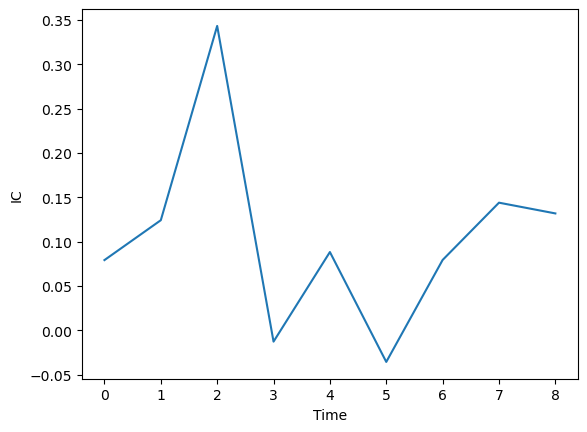

In [3]:
plt.plot(range(len(IC)), IC)
plt.xlabel("Time")
plt.ylabel("IC")

In [4]:
alpha3Return.dropna(inplace = True)

In [5]:
alpha3Return.corr()

,0,1
0,1.000000,0.089085
1,0.089085,1.000000


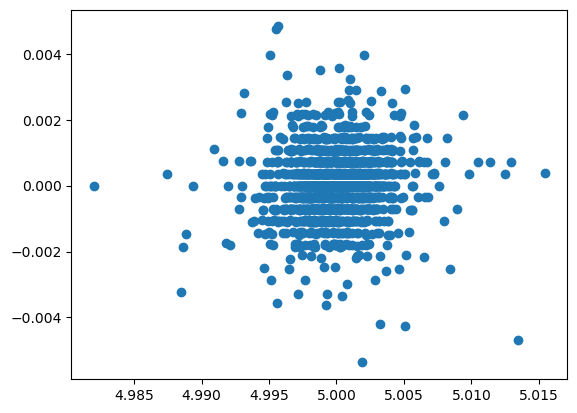

In [6]:
plt.scatter(alpha3Return.iloc[:, 1], alpha3Return.iloc[:, 0])

In [7]:
alpha3Return.to_csv("alpha3.csv")